# Task 2


Implement a circuit that returns |01> and |10> with equal probability.
Requirements :
The circuit should consist only of CNOTs, RXs and RYs. 
Start from all parameters in parametric gates being equal to 0 or randomly chosen. 
You should find the right set of parameters using gradient descent (you can use more advanced optimization methods if you like). 
Simulations must be done with sampling - i.e. a limited number of measurements per iteration and noise. 

Compare the results for different numbers of measurements: 1, 10, 100, 1000. 





# Bonus question:
## How to make sure you produce state |01> + |10> and not |01> - |10> ?

# Answer
I will be using IBM Qiskit and Pennylane to solve this question


# First I would like to answer the bonus question

We need to distinguish between states |01> + |10 >and |01> - |10> this can be easily done by just introducing a third qubit that is ancilla qubit to distinguish between them as shown below:

In [78]:
from qiskit import *
import pennylane as qml
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import array_to_latex


Following are the normal circuits for states  |01> + |10 >/sqrt{2} and  |01> - |10 >/sqrt{2} that is without ancilla qubit.

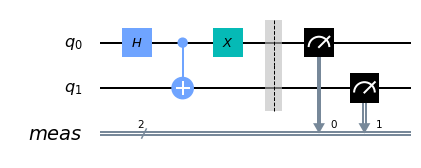

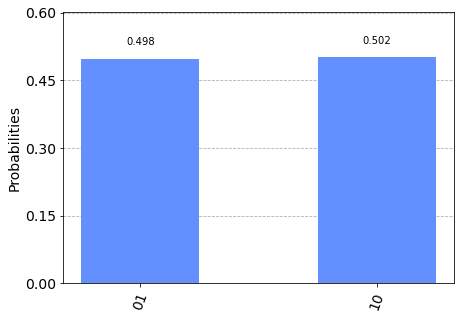

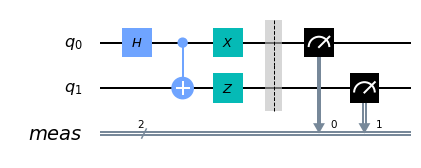

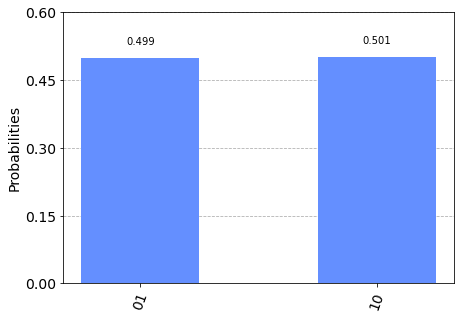

In [79]:
# for circuit  |01> + |10 >/sqrt{2}
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0,1)
qc1.x(0)
qc1.measure_all()
display(qc1.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')
counts1 = execute(qc1 , backend).result().get_counts()
display(plot_histogram(counts1))


# for circuit  |01> - |10 >/sqrt{2}
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0,1)
qc2.x(0)
qc2.z(1)
qc2.measure_all()
display(qc2.draw('mpl'))

counts2 = execute(qc2 , backend).result().get_counts()
display(plot_histogram(counts2))

As we can see results for both are 01 and 10 which cannot be distinguished. Now we will modify the circuits in order to distinguish them by adding a ancilla qubit

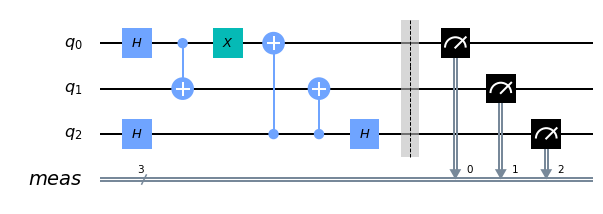

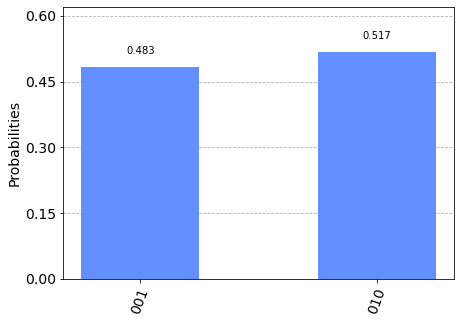

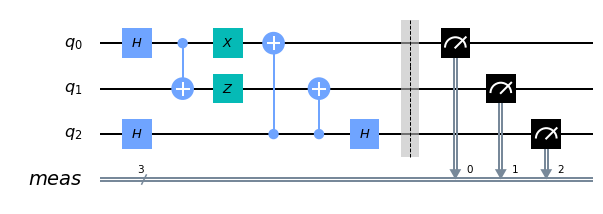

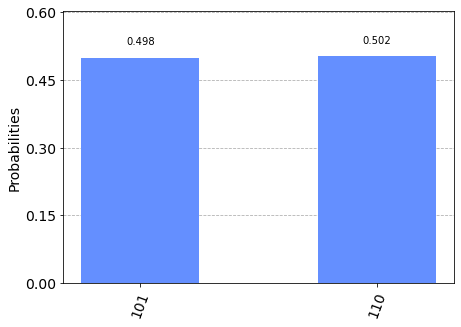

In [80]:
# NOTE q2 is the ancilla qubit
# for circuit  |001> + |010 >/sqrt{2}


# Circuit 1
qc3 = QuantumCircuit(3)
qc3.h(0)
qc3.cx(0,1)
qc3.x(0)
qc3.h(2)
qc3.cx(2,0)
qc3.cx(2,1)
qc3.h(2)
qc3.measure_all()
display(qc3.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')
counts3 = execute(qc3 , backend).result().get_counts()
display(plot_histogram(counts3))


# for circuit  |101> - |011>/sqrt{2}


# Circuit 2
qc4 = QuantumCircuit(3)
qc4.h(0)
qc4.cx(0,1)
qc4.x(0)
qc4.z(1)
qc4.h(2)
qc4.cx(2,0)

qc4.cx(2,1)
qc4.h(2)
qc4.measure_all()
display(qc4.draw('mpl'))

counts4 = execute(qc4 , backend).result().get_counts()
display(plot_histogram(counts4))

As we know the fact that Qiskit Represents the qubits outputs in reverse order that is |q2 q1 q0>
<br>
Hence the first qubit shown in both the outputs is the ancilaa qubit. Hence our output state for circuit 1  is  :

<br>
|0>(|01> + |10>)


<br>

and Output state for circuit 2 is :
<br>

|1>(|01> - |10>)

# Hence for state |01> - |10> the first qubit (|q2>) is |1> and for  |01> + |10> It is |0> , Thus we can clearly distinguish between the states


# Now coming to main question of  task2

In [81]:
def my_quantum_function(x, y):
    qml.RY(y, wires=0)
    qml.RX(x, wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RX(x, wires=1)
    
    return qml.probs(wires=[0, 1]) # qml.probs gives probablity of each state in order [00,01,10,11 ]
dev = qml.device("default.qubit", wires=2)
qnode = qml.QNode(my_quantum_function, dev)
#qnode(0.56, 0.1)


In [82]:
import numpy as np
y_range = np.linspace(0,np.pi/2,50) #50  parameter values 0 to pi/2
x_range = np.linspace(0,np.pi,50)   # 50 parameter values 0 to pi

In [83]:
for i in range(50):
    print(qnode(x_range[i],y_range[i]))

[1. 0. 0. 0.]
[9.97690347e-01 1.02598491e-03 1.31871649e-06 1.28234900e-03]
[9.90792178e-01 4.08395967e-03 2.10334204e-05 5.10282914e-03]
[9.79397247e-01 9.11449492e-03 1.05926586e-04 1.13823319e-02]
[9.63656463e-01 1.60202302e-02 3.32338273e-04 1.99909689e-02]
[9.43776912e-01 2.46683605e-02 8.03766012e-04 3.07509615e-02]
[0.92001779 0.03489403 0.0016476  0.04344059]
[0.89268533 0.04650452 0.00301105 0.0577991 ]
[0.86212687 0.05928418 0.00505646 0.07353248]
[0.82872414 0.07299993 0.00795602 0.09031992]
[0.79288599 0.08740711 0.01188608 0.10782082]
[0.75504072 0.10225577 0.01702125 0.12568226]
[0.71562809 0.11729694 0.02352839 0.14354659]
[0.67509132 0.13228889 0.03156067 0.16105912]
[0.63386923 0.14700322 0.04125188 0.17787567]
[0.59238858 0.16123053 0.05271114 0.19366975]
[0.55105698 0.17478559 0.06601813 0.2081393 ]
[0.51025631 0.18751183 0.08121903 0.22101284]
[0.47033695 0.1992851  0.09832323 0.23205472]
[0.4316129  0.21001652 0.11730095 0.24106963]
[0.39435777 0.21965437 0.1380818

At the end we note that we get probability , [1.87469973e-33, 5.00000000e-01 ,5.00000000e-01 ,1.87469973e-33] in the order [00,01,10,11]

That is about 0% for 00 and 11 and 50% for state 01 and 10. Hence we note that at the end the parameter values are: 

In [57]:
print('Parameter at the end :' + str(x_range[49]) +' and '  + str(y_range[49]))

Parameter at the end :3.141592653589793 and 1.5707963267948966


That is pi and pi/2 . Hence pi and pi/2 are the required parameters. Required circuit is shown below

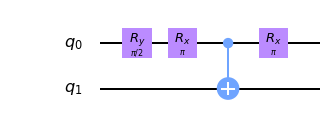

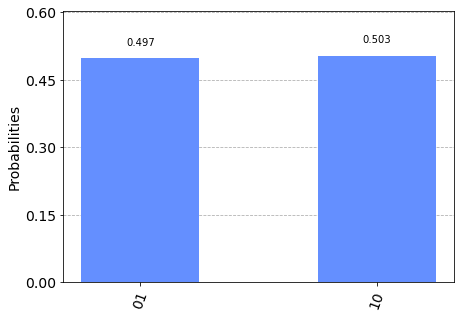

In [85]:
qc = QuantumCircuit(2)
#qc.ry(np.pi/2,0)
#qc.rx(np.pi,0)

qc.ry(np.pi/2,0)
qc.rx(np.pi,0)
qc.cx(0,1)
qc.rx(np.pi,0)


display(qc.draw('mpl'))
qc.measure_all()
counts = execute(qc,backend).result().get_counts()
display(plot_histogram(counts))

## I tried a lot but I couln't find out how to apply gradient descent as I am still in the early learning phase of machine learning. I am highly interested in quantum computing and want to devote my career to this field. I managed to solve the bonus the question which is part of non-invasive measurement. I tried my best for this. Please allow me to get selected in this program as I require guidance in this field and am ready to put my heart and soul into it .
<br>


# # Thank you I learned a lot in the process